In [1]:
import pandas as pd 
import numpy as np

FileNotFoundError: [Errno 2] No such file or directory: '/desktop/LT_spice_circits/analog_output_comparison.png'

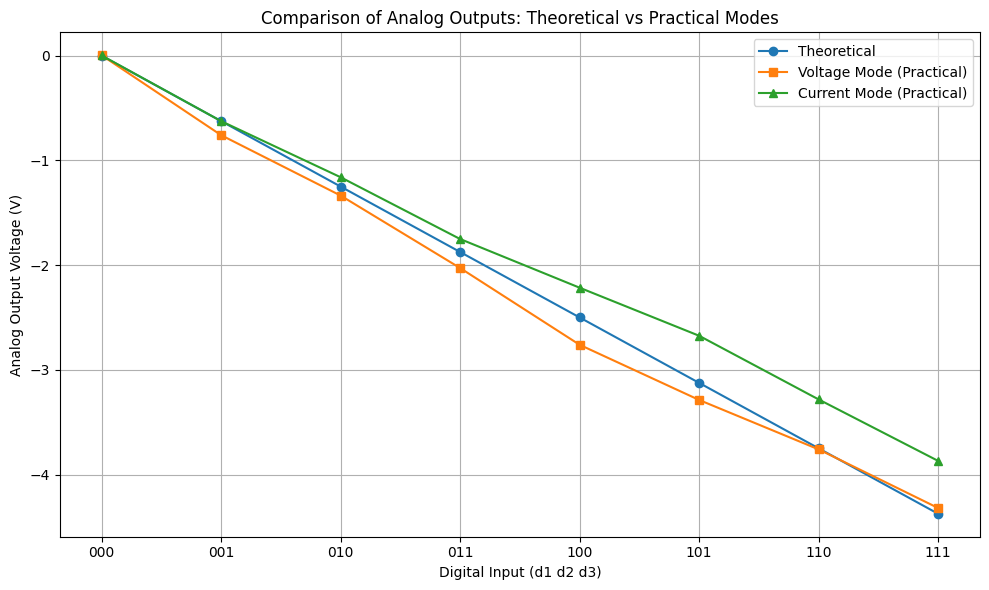

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
d_values = [
    "000", "001", "010", "011",
    "100", "101", "110", "111"
]
theoretical = [0, -0.625, -1.25, -1.875, -2.5, -3.125, -3.75, -4.375]
voltage_mode = [0.004, -0.759, -1.336, -2.028, -2.761, -3.288, -3.76, -4.32]
current_mode = [0.002, -0.625, -1.161, -1.751, -2.216, -2.675, -3.283, -3.87]

# Set up the plot
plt.figure(figsize=(10, 6))
x = np.arange(len(d_values))

plt.plot(x, theoretical, marker='o', label='Theoretical')
plt.plot(x, voltage_mode, marker='s', label='Voltage Mode (Practical)')
plt.plot(x, current_mode, marker='^', label='Current Mode (Practical)')

# Add labels and title
plt.xticks(x, d_values)
plt.xlabel("Digital Input (d1 d2 d3)")
plt.ylabel("Analog Output Voltage (V)")
plt.title("Comparison of Analog Outputs: Theoretical vs Practical Modes")
plt.legend()
plt.grid(True)

# Save the plot to a file
plt.tight_layout()
plot_path = "/desktop/LT_spice_circits/analog_output_comparison.png"
plt.savefig(plot_path)
plt.show()

plot_path


## Solving the problem in the perceptron trick using the sigmoid function and new approach to the algorithm adopting the sigmoid funtion 


In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False, class_sep=30)

In [2]:
import matplotlib.pyplot as plt


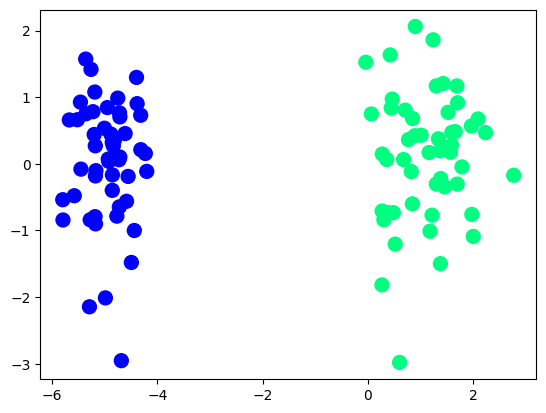

In [3]:
plt.Figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


In [21]:
# Generate a simple dataset
X, y = make_classification(
    n_features=2, 
    n_classes=2, 
    n_informative=2, 
    n_redundant=0, 
    n_clusters_per_class=1, 
    random_state=1
)
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1 for perceptron


In [23]:

# perceptron algorithm
def perceptron(X, y, learning_rate=0.01, epochs=1000):
    weights = np.zeros(X.shape[1])
    bias = 0

    for _ in range(epochs):
        for i in range(len(X)):
            linear_output = np.dot(X[i], weights) + bias
            prediction = np.sign(linear_output)

            # Update rule
            if y[i] * linear_output <= 0:
                weights += learning_rate * y[i] * X[i]
                bias += learning_rate * y[i]

    return weights, bias


In [24]:
# Logistic Regression with Sigmoid and Gradient Descent
def logistic_regression(X, y, learning_rate=0.01, epochs=1000):
    weights = np.zeros(X.shape[1])
    bias = 0

    for _ in range(epochs):
        linear_output = np.dot(X, weights) + bias
        predictions = sigmoid(linear_output)

        # Gradient Descent Updates
        errors = y - predictions
        gradient_weights = -np.dot(X.T, errors) / len(y)
        gradient_bias = -np.mean(errors)

        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias

    return weights, bias


In [25]:
# Train Perceptron
weights_perceptron, bias_perceptron = perceptron(X, y)

# Train Logistic Regression
weights_logistic, bias_logistic = logistic_regression(X, np.where(y == -1, 0, 1))  # Use 0/1 labels for logistic regression


In [1]:
# visualize the decision boundary
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(X, y, weights, bias, title):
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')

    # Generate decision boundary line
    x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x2 = -(weights[0] * x1 + bias) / weights[1]

    plt.plot(x1, x2, color='green', label='Decision Boundary')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.legend()
    plt.show()


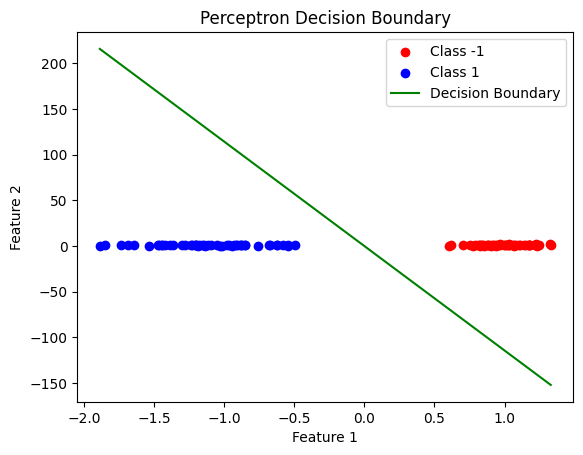

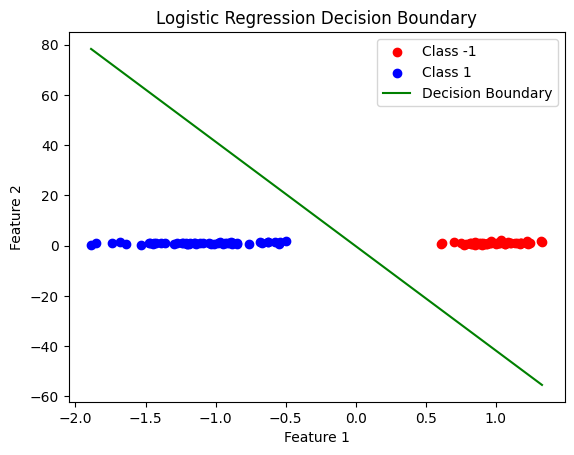

In [27]:
# Plot decision boundary for Perceptron
plot_decision_boundary(X, y, weights_perceptron, bias_perceptron, "Perceptron Decision Boundary")

# Plot decision boundary for Logistic Regression
plot_decision_boundary(X, y, weights_logistic, bias_logistic, "Logistic Regression Decision Boundary")


In [32]:
from sklearn.datasets import make_classification

In [33]:
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False, class_sep=20)

In [34]:
import matplotlib.pyplot as plt


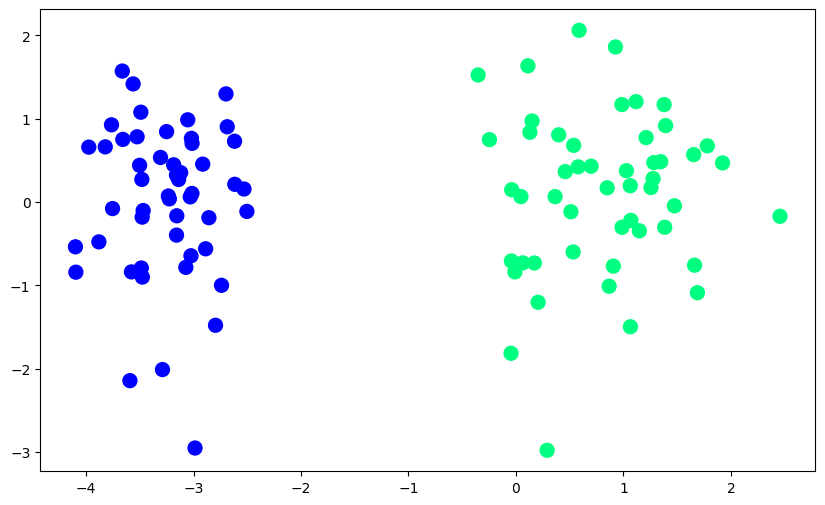

In [35]:
plt.figure(figsize=(10, 6))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)

In [36]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None,solver='sag')
lor.fit(X, y)

c:\Users\santo\OneDrive\Desktop\COESIS30  DAY CHALLANGE\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [37]:
print(lor.coef_, lor.intercept_,sep='\n')

[[4.77755563 0.20623085]]
[5.7435939]


In [38]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [39]:
x_input = np.linspace(-3, 3, 100)
y_input = m1 * x_input + b1

In [40]:
def gd(X,y):

    X= np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    learning_rate = 0.5

    for i in range(3000):
        y_hat = sigmoid(np.dot(X, weights))
        weights += learning_rate * (np.dot((y-y_hat), X) / X.shape[0])
    return weights[1:], weights[0]

In [41]:
# Define the sigmoids function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [42]:
coef_, intercept_ = gd(X, y)

In [43]:
coef_, intercept_

(array([4.48732321, 0.18187793]), np.float64(5.326795923389575))

In [44]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])  

In [45]:
x_input1 = np.linspace(-3, 3, 100)
y_input1 = m * x_input1 + b

(-3.0, 2.0)

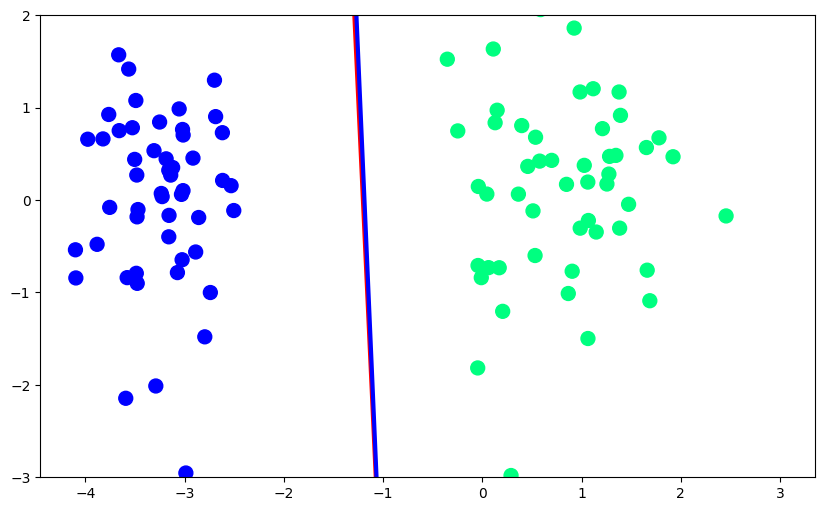

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.plot(x_input1, y_input1, color='blue', linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)

In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\santo\OneDrive\Desktop\COESIS30  DAY CHALLANGE\heart.csv")


In [4]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [8]:
pd.unique(df['age'])

array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=2)
# X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,1],test_size=0.2,random_state=2)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [20]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [21]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

c:\Users\santo\OneDrive\Desktop\COESIS30  DAY CHALLANGE\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [22]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
546,70,1,0,130,322,0,0,109,0,2.4,1,3,2
980,57,1,0,140,192,0,1,148,0,0.4,1,0,1
908,62,1,0,120,267,0,1,99,1,1.8,1,2,3
577,70,1,0,130,322,0,0,109,0,2.4,1,3,2
846,35,0,0,138,183,0,1,182,0,1.4,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,44,1,1,120,263,0,1,173,0,0.0,2,0,3
832,68,1,2,118,277,0,1,151,0,1.0,2,1,3
451,49,0,1,134,271,0,1,162,0,0.0,1,0,2
775,51,1,2,100,222,0,1,143,1,1.2,1,0,2


In [23]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
172,56,1,1,120,240,0,1,169,0,0.0,0,0,2
128,52,1,2,138,223,0,1,169,0,0.0,2,4,2
363,53,1,2,130,246,1,0,173,0,0.0,2,3,2
636,59,0,0,174,249,0,1,143,1,0.0,1,0,2
798,59,1,3,170,288,0,0,159,0,0.2,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,52,1,1,120,325,0,1,172,0,0.2,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
584,55,1,0,132,353,0,1,132,1,1.2,1,1,3
493,55,1,0,132,353,0,1,132,1,1.2,1,1,3


In [24]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy of Logistic Regression:", accuracy_score(y_test, y_pred1))
print("Accuracy of Decision Tree:", accuracy_score(y_test, y_pred2))    

Accuracy of Logistic Regression: 0.8439024390243902
Accuracy of Decision Tree: 0.9804878048780488


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84       105
           1       0.80      0.91      0.85       100

    accuracy                           0.84       205
   macro avg       0.85      0.85      0.84       205
weighted avg       0.85      0.84      0.84       205



In [27]:
confusion_matrix(y_test, y_pred1)

array([[82, 23],
       [ 9, 91]])

In [29]:
print("Logistic Regression Confusion Matrix:")
pd.DataFrame(confusion_matrix(y_test, y_pred1), columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

Logistic Regression Confusion Matrix:


,Predicted 0,Predicted 1
Actual 0,82,23
Actual 1,9,91


In [30]:
print("Decision Tree Confusion Matrix:")
pd.DataFrame(confusion_matrix(y_test, y_pred2), columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])


Decision Tree Confusion Matrix:


,Predicted 0,Predicted 1
Actual 0,101,4
Actual 1,0,100


In [32]:
print("Logistic Regression Confusion Matrix:")
pd.DataFrame(confusion_matrix(y_test, y_pred1), columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

Logistic Regression Confusion Matrix:


,Predicted 0,Predicted 1
Actual 0,82,23
Actual 1,9,91


In [2]:

import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\santo\OneDrive\Desktop\COESIS30  DAY CHALLANGE\placement.csv" )

In [7]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [4]:
df.head()


,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
# the unnecessaery column is removed 
df = df.iloc[:,1:]

In [6]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [61]:
## steps 
# 1. check for missing values
# 2. check for categorical values
# 3. check for correlation
# 4. check for outliers
# 5. check for feature importance
# 6. check for feature scaling
# 7. check for feature selection
# 8. check for model selection
# 9. check for model evaluation
# 10. check for model deployment
 

In [10]:
import matplotlib.pyplot as plt


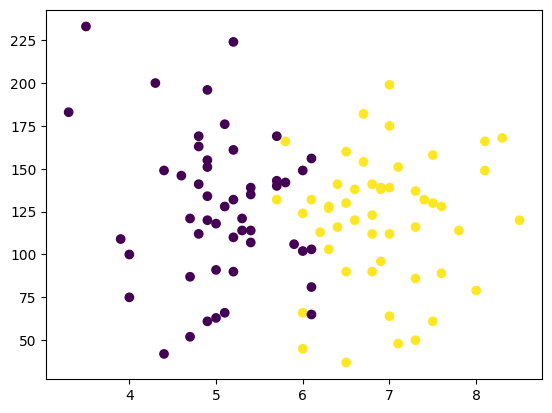

In [13]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [27]:
X = df.iloc[:, 0:2]

In [28]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [29]:
y= df.iloc[:,-1]

In [30]:
y


0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [31]:
y.shape

(100,)

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=2)


In [33]:
X_train

,cgpa,iq
99,6.2,113.0
92,5.2,110.0
76,4.9,155.0
14,6.1,103.0
0,6.8,123.0
...,...,...
43,6.8,141.0
22,4.9,120.0
72,7.3,116.0
15,5.1,176.0


In [34]:
X_test

,cgpa,iq
83,7.5,130.0
30,7.6,128.0
56,6.1,65.0
24,4.7,121.0
16,5.2,224.0
23,4.7,87.0
2,5.3,121.0
27,6.0,124.0
28,5.2,90.0
13,6.4,116.0


In [35]:
y_train

99    1
92    0
76    0
14    0
0     1
     ..
43    1
22    0
72    1
15    0
40    0
Name: placement, Length: 90, dtype: int64

In [36]:
y_test

83    1
30    1
56    0
24    0
16    0
23    0
2     0
27    1
28    0
13    1
Name: placement, dtype: int64

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) 

In [38]:
X_train

array([[ 0.16981077, -0.27485148],
       [-0.69853978, -0.35042165],
       [-0.95904494,  0.7831308 ],
       [ 0.08297572, -0.52675203],
       [ 0.6908211 , -0.02295094],
       [ 0.95132627,  0.68237059],
       [ 1.21183143,  0.20375955],
       [ 0.86449121, -0.30004154],
       [ 1.12499638,  0.32970982],
       [ 0.43031594, -0.85422273],
       [ 0.6908211 , -0.85422273],
       [ 0.77765616,  0.35489988],
       [-0.2643645 ,  1.13579157],
       [ 1.29866649, -1.58473431],
       [-0.95904494, -1.58473431],
       [ 0.95132627, -1.91220502],
       [-0.87220989, -0.82903268],
       [ 1.12499638, -1.86182491],
       [ 0.60398605,  0.75794075],
       [-0.00385934, -0.55194208],
       [ 1.81967682,  1.0602214 ],
       [-0.09069439, -0.45118186],
       [-1.74056044, -0.60232219],
       [ 0.51715099,  0.35489988],
       [-0.2643645 ,  0.40527999],
       [ 0.08297572, -1.08093322],
       [-0.2643645 ,  0.48085015],
       [-0.95904494,  0.68237059],
       [ 1.29866649,

In [39]:
X_test = scaler.transform(X_test)

In [40]:
X_test

array([[ 1.29866649e+00,  1.53379443e-01],
       [ 1.38550154e+00,  1.02999334e-01],
       [ 8.29757193e-02, -1.48397410e+00],
       [-1.13271505e+00, -7.33310473e-02],
       [-6.98539776e-01,  2.52124456e+00],
       [-1.13271505e+00, -9.29792898e-01],
       [-6.11704721e-01, -7.33310473e-02],
       [-3.85933578e-03,  2.23911595e-03],
       [-6.98539776e-01, -8.54222735e-01],
       [ 3.43480884e-01, -1.99281319e-01]])

In [42]:
from sklearn.linear_model import LogisticRegression


In [43]:
clf = LogisticRegression()

In [44]:
#model training
clf.fit(X_train,y_train)

LogisticRegression()

In [48]:
# model evaluation 
y_pred = clf.predict(X_test)

In [47]:
y_test


83    1
30    1
56    0
24    0
16    0
23    0
2     0
27    1
28    0
13    1
Name: placement, dtype: int64

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

<Axes: >

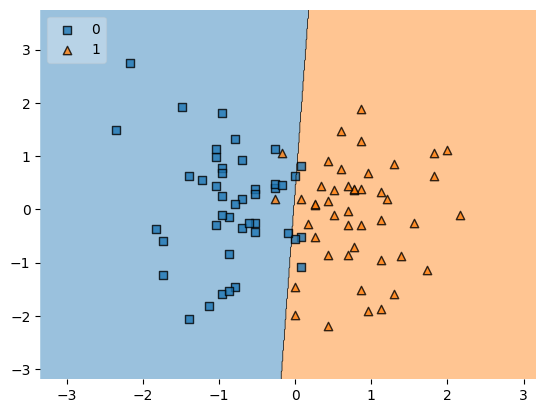

In [57]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)


In [58]:
import pickle

In [59]:
pickle.dump(clf,open('model.pkl','wb'))
